In [1]:
#import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

print('core libraries are imported successfully')

core libraries are imported successfully


In [2]:
#import pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#check pytorch version
print(f"PyTorch Version:{torch.__version__}")

#Check for GPU availability
device=torch.device('cuda' if torch.cuda.is_available() else
                    'mps' if torch.backends.mps.is_available() else 'cpu')

print(f"Using Device:{device}")

#Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

if torch.cuda.is_available():
  torch.cuda.manual_seed(42)

print("\n✓ PyTorch is ready to use!")

PyTorch Version:2.9.0+cpu
Using Device:cpu

✓ PyTorch is ready to use!


In [3]:
#Quick device information
if device.type=='cuda':
  print(f"GPU:{torch.cuda.get_device_name(0)}")
  print(f"CUDA Version:{torch.version.cuda}")
elif device.type=='mps':
  print("Using Apple Metal performance shaders(MPS)")
else:
  print("Using CPU, GPU is not available")
  print("💡 CPU is fine for learning, all code will work")

Using CPU, GPU is not available
💡 CPU is fine for learning, all code will work


#Tensor Basics

In [4]:
#Different methods to create tensors

#From python list
tensor_from_list=torch.tensor([[1, 2,], [3, 4]])
print("From List:")
print(tensor_from_list)

#Zeros and Ones
Zeros=torch.zeros(2, 3)
Ones=torch.ones(2, 3)
print(f"\nZeros:\n{Zeros}")
print(f"\nOnes:\n{Ones}")

#Random Tensors
rand_tensor=torch.rand(2, 3)
randn_tensor=torch.randn(2, 3)

print(f"Random(Uniform):\n{rand_tensor}")
print(f"Random(Normal):\n{randn_tensor}")

From List:
tensor([[1, 2],
        [3, 4]])

Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Random(Uniform):
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
Random(Normal):
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])


In [5]:
#Tensor Attributes
x=torch.randn(3, 4)

print(f"Tensor:\n{x}")
print(f"Shape:{x.shape}")
print(f"Size:{x.size()}")
print(f"Data Type:{x.dtype}")
print(f"Device:{x.device}")
print(f"Requires Grad:{x.requires_grad}")

Tensor:
tensor([[ 0.3930,  0.4327, -1.3627,  1.3564],
        [ 0.6688, -0.7077, -0.3267, -0.2788],
        [-0.4220, -1.3323, -0.3639,  0.1513]])
Shape:torch.Size([3, 4])
Size:torch.Size([3, 4])
Data Type:torch.float32
Device:cpu
Requires Grad:False


In [6]:
#Tensor Operations
a=torch.tensor([1.0, 2.0, 3.0])
b=torch.tensor([4.0, 5.0, 6.0])

print("a:", a)
print("b:", b)
print("\nOperations:")
print("a + b =", a+b)
print("a - b =", a-b)
print("a * b =", a*b)
print("a @ b=", a@b) #Dot Product
print("a.sum():", a.sum())
print("a.mean():", a.mean())
print("a.max():", a.max())

a: tensor([1., 2., 3.])
b: tensor([4., 5., 6.])

Operations:
a + b = tensor([5., 7., 9.])
a - b = tensor([-3., -3., -3.])
a * b = tensor([ 4., 10., 18.])
a @ b= tensor(32.)
a.sum(): tensor(6.)
a.mean(): tensor(2.)
a.max(): tensor(3.)


In [7]:
#Reshaping and Indexing
x = torch.arange(12)
print("Original:", x)

#Reshape to 3X4
reshape=x.view(3, 4)
print(f"Tensor Reshaped:\n{reshape}")
print(f"\nFirst Row:{reshape[0]}")
print(f"\nFirst Column:{reshape[:, 0]}")
print(f"Element [1, 2]:{reshape[1, 2]}")

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Tensor Reshaped:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

First Row:tensor([0, 1, 2, 3])

First Column:tensor([0, 4, 8])
Element [1, 2]:6


#GPU Tensors

In [8]:
#Create Tensor on CPU
x_cpu=torch.randn(3, 3)
print(f"CPU Tensor device:{x_cpu.device}")

#Move to GPU (if available)
x_gpu=x_cpu.to(device)
print(f"GPU Tensor device:{x_gpu.device}")

#Or directly on device
y=torch.ones(3, 3, device=device)
print(f"Direct creation device:{y.device}")

print("\n💡 Use .to(device) to move tensors and models to GPU/CPU")

CPU Tensor device:cpu
GPU Tensor device:cpu
Direct creation device:cpu

💡 Use .to(device) to move tensors and models to GPU/CPU


In [9]:
#Numpy to PyTorch
np_array=np.array([[1, 2], [3, 4]])
torch_tensor=torch.from_numpy(np_array)
print(f"Numpy Array:\n{np_array}")
print(f"Torch Tensor:\n{torch_tensor}")

#PyTorch to numpy
tensor=torch.randn(2, 3)
numpy_array=tensor.numpy()
print("\nTensor:")
print(tensor)
print("\nNumpy:")
print(numpy_array)

print("\n⚠️ Warning: NumPy arrays and tensors share memory!")

Numpy Array:
[[1 2]
 [3 4]]
Torch Tensor:
tensor([[1, 2],
        [3, 4]])

Tensor:
tensor([[ 0.5567,  0.0744,  0.7113],
        [-0.5687,  1.2580, -1.5890]])

Numpy:
[[ 0.55673623  0.07442352  0.71131057]
 [-0.56865716  1.2580069  -1.5889642 ]]

⚠️ Warning: NumPy arrays and tensors share memory!


Auto Grad (Automatic Differentiation)

In [10]:
#Enable gradient tracking
x=torch.tensor([2.0], requires_grad=True)
print(f"x={x}")
print(f"Requires Grad:{x.requires_grad}")

#Compute y=x^2+3
y=x**2+3
print(f"\ny:{y}")

#Compute Gradient
y.backward()
print(f"\ndy/dx at x=2: {x.grad}")
print(f"Expected (2 * 2 = 4): 4")

print("\n💡 Autograd is what makes PyTorch 'auto'-matic!")

x=tensor([2.], requires_grad=True)
Requires Grad:True

y:tensor([7.], grad_fn=<AddBackward0>)

dy/dx at x=2: tensor([4.])
Expected (2 * 2 = 4): 4

💡 Autograd is what makes PyTorch 'auto'-matic!


#Data Handling

In [11]:
# Load Fashion MNIST dataset
from torchvision import datasets, transforms

# Define transformation - convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
train_dataset = datasets.FashionMNIST(
    root='.\data',
    train=True,
    download=True,
    transform=transform
)

# Download and load test data
test_dataset = datasets.FashionMNIST(
    root='.\data',
    train=False,
    download=True,
    transform=transform
)

print(f"Training Samples:{len(train_dataset)}")
print(f"Test Samples:{len(test_dataset)}")

print("\n✓ Fashion MNIST loaded!")

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.82MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 152kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.82MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.7MB/s]

Training Samples:60000
Test Samples:10000

✓ Fashion MNIST loaded!


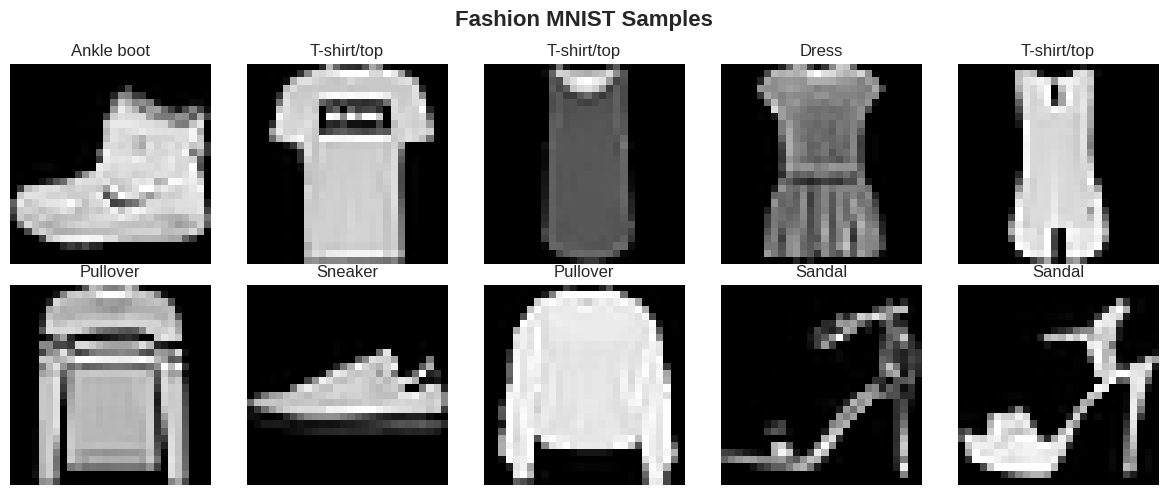

In [12]:
# Fashion MNIST class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize Samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Fashion MNIST Samples', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
  image, label = train_dataset[i]
  ax.imshow(image.squeeze(), cmap='gray')
  ax.set_title(f"{class_names[label]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

Dataloader - Batching and Shuffling

In [13]:
#!pip install DataLoader

In [14]:
#Create Dataloaders
batch_size = 64

train_loader = DataLoader (
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0
)

print(f"Number of training batches:{len(train_loader)}")
print(f"Number of test batches:{len(test_loader)}")
print(f"Batch Size:{batch_size}")

Number of training batches:938
Number of test batches:157
Batch Size:64


In [15]:
#Inspect a batch
images, labels = next(iter(train_loader))

print(f"Batch images shape:{images.shape}")
print(f"Batch labels shape:{labels.shape}")
print(f"\nImage dtype:{images.dtype}")
print(f"\nLabel dtype:{labels.dtype}")
print(f"Image Range:[{images.min():.2f}, {images.max():.2f}]")

Batch images shape:torch.Size([64, 1, 28, 28])
Batch labels shape:torch.Size([64])

Image dtype:torch.float32

Label dtype:torch.int64
Image Range:[-1.00, 1.00]


#Custom Dataset example

In [17]:
#Load Iris Dataset for binary classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris=load_iris()
X=iris.data
y=iris.target

#Binary Classification (setosa (0) vs Not setosa (1))
y_binary = (y!=0).astype(np.int64)

#Split data
X_train, X_test, y_train, y_test=train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler=StandardScaler()
#Normalize
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print(f"Iris dataset loaded")
print(f"Training Samples:{len(X_train)}")
print(f"Test Samples:{len(X_test)}")
print(f"Features:{X_train.shape[1]}")

Iris dataset loaded
Training Samples:120
Test Samples:30
Features:4


In [24]:
#Convert to pytorch tensor and create TensorDataset
X_train_tensor=torch.FloatTensor(X_train)
y_train_tensor=torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor=torch.FloatTensor(X_test)
y_test_tensor=torch.FloatTensor(y_test).unsqueeze(1)

#Create datasets
iris_train_dataset=TensorDataset(X_train_tensor, y_train_tensor)
iris_test_dataset=TensorDataset(X_test_tensor, y_test_tensor)

#Create dataloaders
iris_train_loader=DataLoader(iris_train_dataset, batch_size=16, shuffle=True)
iris_test_loader=DataLoader(iris_test_dataset, batch_size=16, shuffle=False)

print("✓ Iris dataloader is created!")

✓ Iris dataloader is created!
